In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_excel('merged_data.xlsx')
df['Continent'] = pd.Series(df['Continent'], dtype="category")
df['log_gdp'] = np.log(df['GDP Per Capita (US$)'])
print(df.columns)
df.head()

Index(['Continent', 'Region', 'Country', 'Criminality', 'Criminal markets',
       'Human trafficking', 'Human smuggling', 'Arms trafficking',
       'Flora crimes', 'Fauna crimes', 'Non-renewable resource crimes',
       'Heroin trade', 'Cocaine trade', 'Cannabis trade',
       'Synthetic drug trade', 'Criminal actors', 'Mafia-style groups',
       'Criminal networks', 'State-embedded actors', 'Foreign actors',
       'Resilience', 'Political leadership and governance',
       'Government transparency and accountability',
       'International cooperation', 'National policies and laws',
       'Judicial system and detention', 'Law enforcement',
       'Territorial integrity', 'Anti-money laundering',
       'Economic regulatory capacity', 'Victim and witness support',
       'Prevention', 'Non-state actors', 'Year', 'Unit',
       'GDP Per Capita (US$)', 'Code Value', 'log_gdp'],
      dtype='object')


,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,GDP Per Capita (US$),Code Value,log_gdp
0,Asia,Western Asia,Turkey,6.89,6.4,7.0,9.0,9.0,4.0,3.0,...,2.0,4.0,4.0,3.5,3.5,2021,US$,9661.23,TUR,9.175876
1,Africa,West Africa,Cabo Verde,4.04,3.7,4.5,2.0,2.5,2.5,4.0,...,5.0,6.0,3.5,6.0,7.0,2021,US$,3293.23,CPV,8.099624
2,Africa,Southern Africa,South Africa,6.63,6.0,4.5,4.0,8.0,3.5,7.5,...,6.0,6.0,4.0,5.0,7.0,2021,US$,7055.06,ZAF,8.861500
3,South America,South America,Colombia,7.66,7.2,7.5,7.0,8.0,6.0,7.0,...,6.0,5.0,3.5,4.5,6.5,2021,US$,6104.14,COL,8.716723
4,South America,South America,Peru,6.35,6.2,7.0,6.0,5.5,7.0,5.5,...,4.5,4.0,3.5,3.0,4.5,2021,US$,6621.65,PER,8.798100


In [13]:
print(df[['log_gdp', 'Criminality']].corr())

X = df['log_gdp']
X = sm.add_constant(X)
y = df['Criminality']

model = sm.OLS(y, X)
fitted = model.fit()
fitted.params

              log_gdp  Criminality
log_gdp      1.000000    -0.377859
Criminality -0.377859     1.000000


const      7.823431
log_gdp   -0.338092
dtype: float64

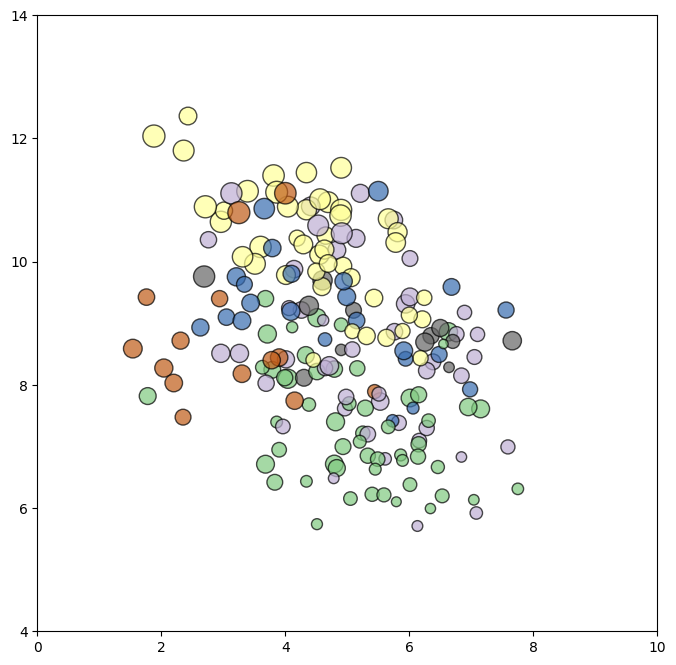

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=df['Criminality'], y=df['log_gdp'], s=df['Resilience']*30, c=df['Continent'].cat.codes, cmap="Accent", alpha=0.7, edgecolors='black')
ax.set_xlim(0,10)
ax.set_ylim(4,14)
plt.show()